<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

## Loading Datasets

In [32]:
import pandas as pd

link_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
link_names = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names'

data_1 = pd.read_csv(link_data) # There was no header for this dataset
print(data_1.head())
data_1.shape 


   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


(305, 4)

In [35]:
data_1 = pd.read_csv(link_data, header=None)
print(data_1.head())
data_1.shape # what size is this dataset? 306 rows/instances 4 columns/features

    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1


(306, 4)

In [15]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

# This gives the information about the dataset above. You can see that there are 306 instances as recorded.

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

### Validation and Cleaning

In [19]:
data_1.isna().sum() # There are no NaNs in any of the features

0    0
1    0
2    0
3    0
dtype: int64

In [75]:
col_headers = ['age', 'op_year', 'nodes', 'survived']

df = pd.read_csv(link_data, header=None, names=col_headers)
print(df.head())
df.shape

   age  op_year  nodes  survived
0   30       64      1         1
1   30       62      3         1
2   30       65      0         1
3   31       59      2         1
4   31       65      4         1


(306, 4)

In [76]:
print(df['survived'].head())
df['survived'].value_counts()


0    1
1    1
2    1
3    1
4    1
Name: survived, dtype: int64


1    225
2     81
Name: survived, dtype: int64

In [77]:
# Change '1' to be survived and '2' to be did not survive

import numpy as np

df['survived'] = np.where((df['survived'] == 1), 1, 0)
print(df['survived'].head())
df['survived'].value_counts()

0    1
1    1
2    1
3    1
4    1
Name: survived, dtype: int64


1    225
0     81
Name: survived, dtype: int64

### Cleaned Dataset

In [79]:
df.head()

,age,op_year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

### Graphs

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

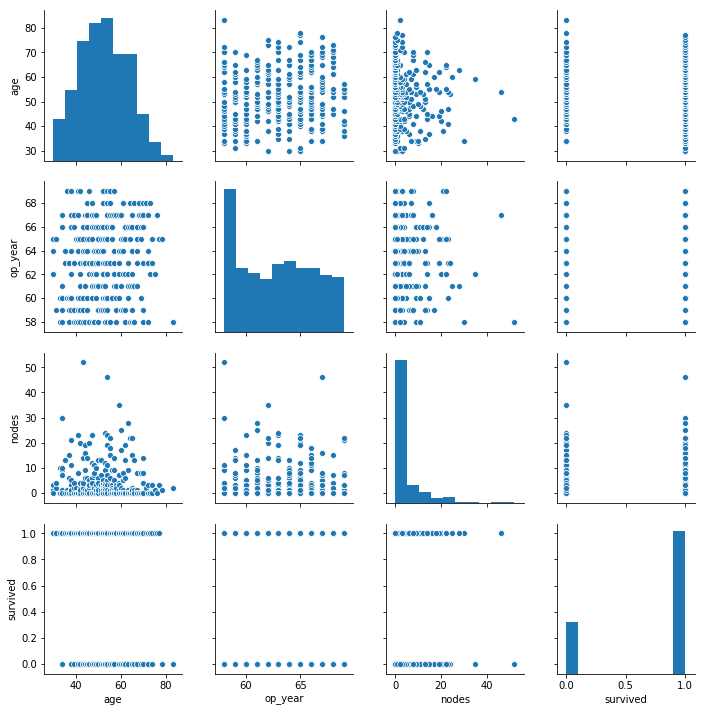

In [85]:
sns.pairplot(df);

Honestly these aren't easy to read/don't tell me much. It is hard to see any correlation for any of these

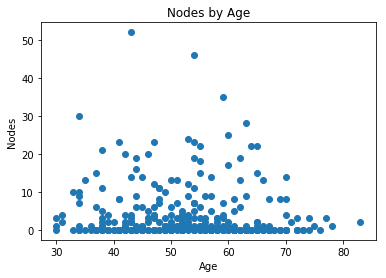

In [90]:
plt.scatter(df['age'], df['nodes'])
plt.title('Nodes by Age')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.show()

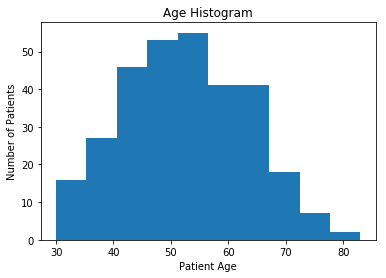

In [142]:
plt.hist(df['age'])
plt.title('Age Histogram')
plt.xlabel('Patient Age')
plt.ylabel('Number of Patients')
plt.show()

### Comparison Tables

In [113]:
df.describe()

,age,op_year,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [100]:
df['nodes'].value_counts()  # there are lots of values so I will try to box some

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [136]:
node_bins = pd.cut(df['nodes'],5)

pd.crosstab(node_bins, df['survived'])

survived,0,1
nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


In [128]:
year_bins = pd.cut(df['op_year'],5)

year_bins.value_counts()

(57.989, 60.2]    91
(62.4, 64.6]      61
(64.6, 66.8]      56
(66.8, 69.0]      49
(60.2, 62.4]      49
Name: op_year, dtype: int64

In [129]:
pd.crosstab(year_bins, df['survived'], normalize='columns')

survived,0,1
op_year,,
"(57.989, 60.2]",0.308642,0.293333
"(60.2, 62.4]",0.123457,0.173333
"(62.4, 64.6]",0.197531,0.200000
"(64.6, 66.8]",0.234568,0.164444
"(66.8, 69.0]",0.135802,0.168889


I am not really seeing any kind of correlation between year of operation and surviving


1.   Bin 1 has a slightly higher (1%) percentage of death
2.   Bin 2 has a a fair amount lower (5%) chance of death
3.   Bin 3 has a slightly higher (1%) percentage of death
4.   Bin 4 has a a fair amount higher (7%) chance of death
5.   Bin 5 has a slightly lower (3%) percentage of death







In [152]:
age_bins = pd.cut(df['age'],10) # Same number of bins as age histogram

age_bins.value_counts()

(51.2, 56.5]      55
(45.9, 51.2]      53
(40.6, 45.9]      46
(61.8, 67.1]      41
(56.5, 61.8]      41
(35.3, 40.6]      27
(67.1, 72.4]      18
(29.947, 35.3]    16
(72.4, 77.7]       7
(77.7, 83.0]       2
Name: age, dtype: int64

In [151]:
pd.crosstab(age_bins, df['survived'], normalize='columns')

survived,0,1
age,,
"(29.947, 35.3]",0.024691,0.062222
"(35.3, 40.6]",0.024691,0.111111
"(40.6, 45.9]",0.185185,0.137778
"(45.9, 51.2]",0.197531,0.164444
"(51.2, 56.5]",0.222222,0.164444
"(56.5, 61.8]",0.111111,0.142222
"(61.8, 67.1]",0.148148,0.128889
"(67.1, 72.4]",0.049383,0.062222
"(72.4, 77.7]",0.012346,0.026667


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Answer 1

As age increases survival rate decreases

In [153]:
pd.crosstab(age_bins, df['survived'], normalize='columns')

survived,0,1
age,,
"(29.947, 35.3]",0.024691,0.062222
"(35.3, 40.6]",0.024691,0.111111
"(40.6, 45.9]",0.185185,0.137778
"(45.9, 51.2]",0.197531,0.164444
"(51.2, 56.5]",0.222222,0.164444
"(56.5, 61.8]",0.111111,0.142222
"(61.8, 67.1]",0.148148,0.128889
"(67.1, 72.4]",0.049383,0.062222
"(72.4, 77.7]",0.012346,0.026667


You can see from these cross tabs that the percentage of survival vs death as age increases their chance of survival decreases

### Answer 2

 As nodes increase survival rate decreases



In [154]:
pd.crosstab(node_bins, df['survived'])

survived,0,1
nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


Once over 10-15 nodes, survival chance are about 50% under 10-15 nodes it is closer to 25%

### Answer 3

 The older patients had slighly less nodes than younger patients. This is likely because younger patients with a high number of nodes would not survive more than 5 years. It should also be noted that a significant margin of operations were held middle aged patients which doesn't give a lot of data to support either of my claims.




